NLTK Preprocessing steps: Compare Text Analytics, NLP and Text Mining Text Analysis Operations using NLTK Tokenization Stopwords Lexicon Normalization such as Stemming and Lemmatization POS Tagging

In [1]:
#Import nltk and 'punkt' to used the .tokenized() method
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jrose\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Had issues with columns data type: 'float object is not iterable'
filepath = ('RT_CLEAN_DATA.csv')
df = pd.read_csv(filepath, encoding = "ISO-8859-1")
# df.head()

In [3]:
list(df)

['Instructor Name (encoded)',
 'Instructor ID',
 'Learning Assignment: Completed On',
 'Learning Assignment: Learning Plan: Learning Plan Name',
 'Learning Assignment: Times Launched',
 'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
 'Question Number',
 'Question Text',
 'Response Text Long',
 'Taught in Last 12 Months',
 'Avg. Score - Knowledge of the course content',
 'Avg. Score - Training and facilitation skills',
 'Number of Classes Taught',
 'Number of Attendees',
 'COUNT NAME',
 'CLEAN']

In [4]:
df.dtypes

Instructor Name (encoded)                                                  object
Instructor ID                                                               int64
Learning Assignment: Completed On                                          object
Learning Assignment: Learning Plan: Learning Plan Name                     object
Learning Assignment: Times Launched                                         int64
Learning Assignment: Learning Plan Section: Learning Plan Section Name     object
Question Number                                                             int64
Question Text                                                              object
Response Text Long                                                         object
Taught in Last 12 Months                                                     bool
Avg. Score - Knowledge of the course content                              float64
Avg. Score - Training and facilitation skills                             float64
Number of Classe

In [5]:
df.shape[0]

6240

In [6]:
#Use tokenizer to divide a text into a list of sentences using an unsupervised algorithm 
#RegexpTokenizer splits a string into substrings using a regular expression - used this method because it removes punctuations
from nltk.tokenize import RegexpTokenizer

tokens_list=[]

tokenizer = RegexpTokenizer(r'\w+')
for idx, row in df.iterrows(): 
#     if row['What_can_SAI_make_easier_for_you__c']: 
    tokens=tokenizer.tokenize(str(row['Response Text Long']))
    tokens_list.append(tokens)

In [7]:
#View tokens_list
tokens_list

[['Helping',
  'the',
  'different',
  'roles',
  'understand',
  'their',
  'place',
  'and',
  'responsibilities',
  'during',
  'PI',
  'Planning',
  'I',
  'am',
  'hoping',
  'the',
  'tools',
  'and',
  'new',
  'plans',
  'will',
  'help',
  'drive',
  'this',
  'home',
  'more',
  'effectively',
  'than',
  'in',
  'previous',
  'versions'],
 ['The', 'virtual', 'classroom', 'tools'],
 ['Leadership',
  'topics',
  'they',
  'are',
  'always',
  'the',
  'most',
  'rewarding',
  'to',
  'teach'],
 ['PI',
  'planning',
  'simulation',
  'in',
  'collaborate',
  'I',
  'think',
  'it',
  'will',
  'go',
  'great'],
 ['I', 'have', 'not', 'treid', 'any'],
 ['i',
  'love',
  'the',
  'Aids',
  'But',
  'i',
  'want',
  'to',
  'use',
  'them',
  'with',
  'safe',
  'collaborate',
  'not',
  'just',
  'with',
  'Google',
  'drive'],
 ['About',
  'the',
  'Lean',
  'Agile',
  'Principles',
  'Because',
  'they',
  'are',
  'powerful',
  'principles',
  'that',
  'can',
  'guide',
  'all

In [8]:
len(tokens_list)

6240

In [11]:
#Cannot pass an iterable list as an argument, therefore needed to add the lists together
toke_allWords = []
for wordList in tokens_list:
    toke_allWords += wordList

In [13]:
toke_allWords

['Helping',
 'the',
 'different',
 'roles',
 'understand',
 'their',
 'place',
 'and',
 'responsibilities',
 'during',
 'PI',
 'Planning',
 'I',
 'am',
 'hoping',
 'the',
 'tools',
 'and',
 'new',
 'plans',
 'will',
 'help',
 'drive',
 'this',
 'home',
 'more',
 'effectively',
 'than',
 'in',
 'previous',
 'versions',
 'The',
 'virtual',
 'classroom',
 'tools',
 'Leadership',
 'topics',
 'they',
 'are',
 'always',
 'the',
 'most',
 'rewarding',
 'to',
 'teach',
 'PI',
 'planning',
 'simulation',
 'in',
 'collaborate',
 'I',
 'think',
 'it',
 'will',
 'go',
 'great',
 'I',
 'have',
 'not',
 'treid',
 'any',
 'i',
 'love',
 'the',
 'Aids',
 'But',
 'i',
 'want',
 'to',
 'use',
 'them',
 'with',
 'safe',
 'collaborate',
 'not',
 'just',
 'with',
 'Google',
 'drive',
 'About',
 'the',
 'Lean',
 'Agile',
 'Principles',
 'Because',
 'they',
 'are',
 'powerful',
 'principles',
 'that',
 'can',
 'guide',
 'all',
 'the',
 'topics',
 'Principles',
 'Implementing',
 'SAFe',
 'PI',
 'Planning',
 '

In [14]:
#Length of list of words combined
len(toke_allWords)

104797

In [19]:
#Apply stop words - will remove 'a' but not 'A'

# Using stopwords from English Languages
stop_words = set(stopwords.words('english'))
  
stop_filtered = [word for word in toke_allWords if word not in stop_words]

stop_filtered = []

for w in toke_allWords:
    if w not in stop_words:
        stop_filtered.append(w)

In [21]:
len(stop_filtered)

62965

!!! Normalizing the Data - Stemming VS Lemmatization & Pos_tag!!!
Stemming is used to nomralize parts of text data - i.e. will shorten all conjugated verbs to the shortest length of characters possible. Lemmatization is used in NLP and will enable for words that do not have the same root to be grouped together in order for them to be processed as one item.

In [22]:
lemmatizer = WordNetLemmatizer()

#Lemmatize tokens1_stop
lemmatized_output = [lemmatizer.lemmatize(w) for w in stop_filtered]
print(lemmatized_output)

['Helping', 'different', 'role', 'understand', 'place', 'responsibility', 'PI', 'Planning', 'I', 'hoping', 'tool', 'new', 'plan', 'help', 'drive', 'home', 'effectively', 'previous', 'version', 'The', 'virtual', 'classroom', 'tool', 'Leadership', 'topic', 'always', 'rewarding', 'teach', 'PI', 'planning', 'simulation', 'collaborate', 'I', 'think', 'go', 'great', 'I', 'treid', 'love', 'Aids', 'But', 'want', 'use', 'safe', 'collaborate', 'Google', 'drive', 'About', 'Lean', 'Agile', 'Principles', 'Because', 'powerful', 'principle', 'guide', 'topic', 'Principles', 'Implementing', 'SAFe', 'PI', 'Planning', 'simulation', 'usually', 'lot', 'people', 'remote', 'leading', 'safe', 'SAFe', 'remote', 'training', 'aid', 'trying', 'SAFe', 'Collaborate', 'platform', 'upcoming', 'course', 'The', 'dedicated', 'class', 'page', 'created', 'Collaborate', 'SAFe', 'team', 'basic', 'team', 'Then', 'scrum', 'master', 'also', 'there', 'reset', 'scrum', 'org', 'since', 'scrum', 'master', 'pivotal', 'team', 'Custo

In [23]:
len(lemmatized_output) #Doesn't appear to be any change with lemmatization

62965

In [ ]:
#Lemmatize with POS Tag
# from nltk import pos_tag
# from nltk.corpus import wordnet
# import nltk
nltk.download('averaged_perceptron_tagger')

NLTK POS Tags Examples are as Below: https://www.guru99.com/pos-tagging-chunking-nltk.html#:~:text=Some%20NLTK%20POS%20tagging%20examples,tagging%20with%20NLTK%20is%20complete.

In [24]:
#POS Tag = Parts of Speech Tagging is a process to mark up the words in text format
tagged_words = pos_tag(lemmatized_output)
print(tagged)

[('Helping', 'VBG'), ('different', 'JJ'), ('role', 'NN'), ('understand', 'JJ'), ('place', 'NN'), ('responsibility', 'NN'), ('PI', 'NNP'), ('Planning', 'NNP'), ('I', 'PRP'), ('hoping', 'VBG'), ('tool', 'JJ'), ('new', 'JJ'), ('plan', 'NN'), ('help', 'VBP'), ('drive', 'VB'), ('home', 'NN'), ('effectively', 'RB'), ('previous', 'JJ'), ('version', 'NN'), ('The', 'DT'), ('virtual', 'JJ'), ('classroom', 'NN'), ('tool', 'NN'), ('Leadership', 'NNP'), ('topic', 'NN'), ('always', 'RB'), ('rewarding', 'VBG'), ('teach', 'NN'), ('PI', 'NNP'), ('planning', 'NN'), ('simulation', 'NN'), ('collaborate', 'NN'), ('I', 'PRP'), ('think', 'VBP'), ('go', 'VB'), ('great', 'JJ'), ('I', 'PRP'), ('treid', 'VBP'), ('love', 'JJ'), ('Aids', 'NNS'), ('But', 'CC'), ('want', 'VBP'), ('use', 'NN'), ('safe', 'JJ'), ('collaborate', 'NN'), ('Google', 'NNP'), ('drive', 'NN'), ('About', 'IN'), ('Lean', 'NNP'), ('Agile', 'NNP'), ('Principles', 'NNP'), ('Because', 'IN'), ('powerful', 'JJ'), ('principle', 'NN'), ('guide', 'NN'),

In [35]:
#Create a dictionary of word frequency with Frequency Distribution?
#Determine the frequency occurence of each word is column

#Most common words in responses
total_freq_dist_pos = FreqDist(tagged)
print(total_freq_dist_pos.most_common(20))

[(('I', 'PRP'), 847), (('time', 'NN'), 770), (('student', 'NN'), 762), (('class', 'NN'), 743), (('tool', 'NN'), 720), (('day', 'NN'), 604), (('question', 'NN'), 534), (('activity', 'NN'), 471), (('room', 'NN'), 395), (('group', 'NN'), 383), (('trainer', 'NN'), 359), (('one', 'CD'), 352), (('chat', 'WP'), 344), (('training', 'NN'), 342), (('technology', 'NN'), 341), (('people', 'NNS'), 336), (('session', 'NN'), 318), (('training', 'VBG'), 304), (('exercise', 'NN'), 296), (('person', 'NN'), 293)]


In [45]:
#Transform to dataframe
df_preproc = pd.DataFrame(tagged, columns=['Word After Lemmatization', 'Parts of Speech Tag'])
df_preproc['Filtered Stop Words'] = stop_filtered

In [46]:
df_preproc.head()

,Word After Lemmatization,Parts of Speech Tag,Filtered Stop Words
0,Helping,VBG,Helping
1,different,JJ,different
2,role,NN,roles
3,understand,JJ,understand
4,place,NN,place


In [49]:
#Export to csv file for later use
df_preproc.to_csv(r'Preprocessing.csv', index=False)

Preparing Data for the Model 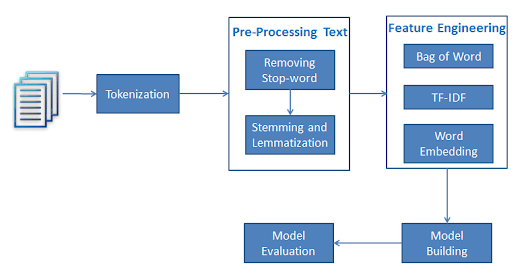

In [50]:
#Create a dictionary of word frequency with Frequency Distribution?
#Determine the frequency occurence of each word is column
from nltk import FreqDist

#Most common part of the column ''What_can_SAI_make_easier_for_you__c'.
total_freq_dist_pos = FreqDist(tagged)
print(total_freq_dist_pos.most_common(20))

[(('I', 'PRP'), 847), (('time', 'NN'), 770), (('student', 'NN'), 762), (('class', 'NN'), 743), (('tool', 'NN'), 720), (('day', 'NN'), 604), (('question', 'NN'), 534), (('activity', 'NN'), 471), (('room', 'NN'), 395), (('group', 'NN'), 383), (('trainer', 'NN'), 359), (('one', 'CD'), 352), (('chat', 'WP'), 344), (('training', 'NN'), 342), (('technology', 'NN'), 341), (('people', 'NNS'), 336), (('session', 'NN'), 318), (('training', 'VBG'), 304), (('exercise', 'NN'), 296), (('person', 'NN'), 293)]


Bag of Words